## 3D scatter plots with Plotly & Python

(copied FROM [StackOverFlow answer by krassowski](https://stackoverflow.com/a/71926421/8508004)   Tuesday, April 19, 2022)

**All of these cells will display plots in current JupyterLab (version 3.2.8 tested) as well.** 


### Interactive 3D surface plot with Plotnine

>"For interactivity you can use any matplotlib backend of your liking, I went with ipylab (pip install ipylab and then %matplotlib widget in a jupyter notebook cell)."- SOURCE [krassowski](https://stackoverflow.com/a/71926421/8508004)

I found also needed ipympl.

For `aes` I adapted info from [Data Carpentry's: Making Plots With plotnine](https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html).

There are [caveats](https://stackoverflow.com/a/71926421/8508004) as spelled out by [michal krassowski (a.k.a. krassowski)](https://stackoverflow.com/users/6646912/krassowski).


*For `%matplotlib widget` I had to start a new session after installing necessary packages. Wouldn't work when just installed with `%pip` magic in the notebook.*

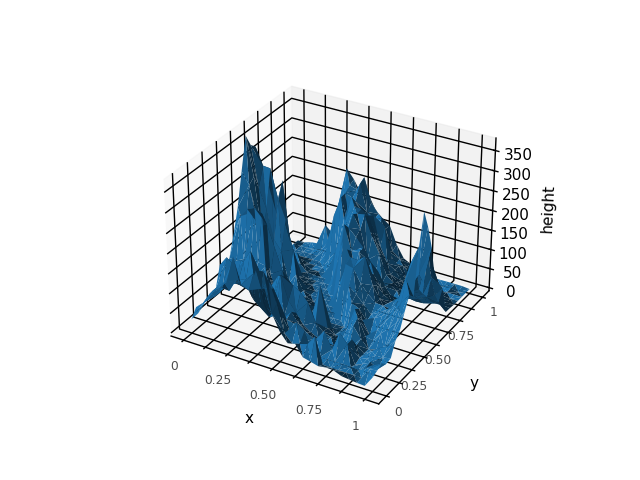

<ggplot: (8731423177409)>

In [1]:
%matplotlib widget

import pandas as pd
import numpy as np

z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv', index_col=0)
z = z_data.values
nrows, ncols = z.shape
x, y = np.linspace(0, 1, nrows), np.linspace(0, 1, ncols)
x, y = np.meshgrid(x, y)
mt_bruno_long = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'height': z.flatten()})

from plotnine import ggplot, geom_polygon, aes, theme_minimal
from plotnine.utils import to_rgba, SIZE_FACTOR
import matplotlib.pyplot as plt


class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])


class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )
(
    ggplot_3d(mt_bruno_long)
    + aes(x='x', y='y', z='height')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

**Click on the plot and drag to adjust the angle of view**.  
It's interactive.

You can always change `%matplotlib widget` to `%matplotlib inline` if you prefer it not to be interactive.

Of note, is that this interactivity is the type that needs an active kernel backing it, and so rendered as static view via [nbviewer](https://nbviewer.org/), they won't be interactive. By contrast Plotly plots, like [these 3D scatter plots](https://nbviewer.org/github/fomightez/3Dscatter_plot-binder/blob/master/Plotly3d-scatter-plots.ipynb) remain interactive without an associated active kernel. (Such abilities for plotly plots are why sometimes the term 'static' for the description of a rendering of a notebook seems woefully inadequate and why I try to direct people to default to using [nbviewer](https://nbviewer.org/) for a better experience and not GitHub's notebook preview.)

[Here](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-using-notebook-widgets.html) and [here](https://github.com/has2k1/plotnine-examples/blob/main/plotnine_examples/examples/facet_grid.ipynb) (which is an example in [a lot of plotnine examples](https://github.com/has2k1/plotnine-examples/tree/main/plotnine_examples/examples)) show that something like `<ggplot: (8787578892441)>` showing next to `Out` and the cell number in bracket is expected with plotnine. However, below I **cover a couple ways to suppress it showing the Python object codes.** 


### Self-contained example based on Matplotlib's documentation

(In case the dataset used in the above example goes away; this one will work because builds own data.)

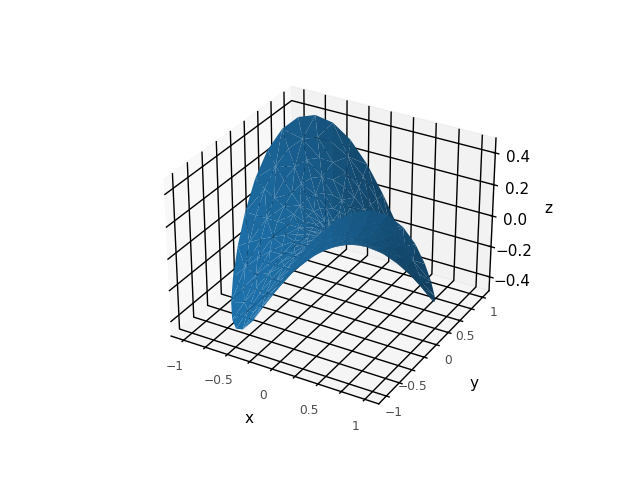

<ggplot: (8731420702381)>

In [2]:
%matplotlib widget
from plotnine import ggplot, geom_polygon, aes, theme_minimal
from plotnine.utils import to_rgba, SIZE_FACTOR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])
        
class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )

n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

z = np.sin(-x*y)
df = pd.DataFrame(dict(x=x,y=y,z=z))

(
    ggplot_3d(df)
    + aes(x='x', y='y', z='z')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

Next suppressing the Python output code you see next to the `Out` indicator, like `Out[2]: <ggplot: (8779925195677)>` is covered.

-------

-------

### Suppress the object code, such as `<ggplot: (8779925195677)>` showing below the plot

Looking around [Here](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-using-notebook-widgets.html) and [here](https://github.com/has2k1/plotnine-examples/blob/main/plotnine_examples/examples/facet_grid.ipynb) (which is an example in [a lot of plotnine examples](https://github.com/has2k1/plotnine-examples/tree/main/plotnine_examples/examples)) show that something like `<ggplot: (8787578892441)>` showing next to `Out` and the cell number in bracket is expected with plotnine. Something like this used to occur with Matplotlib as well and everyone got used to adding a semi-colon to trick Jupyter notebook into suppressing it. Because of the way the REPL model in Jupyter works works, putting the semi-colon suppressed the return by the Matplotlib of the Python object code because the semi-colon became the last thing and it returns nothing (see comment by kynan [here](https://stackoverflow.com/a/31792131/8508004)). And while **that trick works for Plotnine in JupyterLab at present**, it doesn't work with the classic notebook interface. In the classic notebook interface it doesn't work because it only shows nothing as the return of the semi-colon and Plotnine doesn't show up no matter, unllike Matplotlib. You have to specifically block Matplotlib output whereas Plotnine is not so aggressive. 

The **trick that works in both the classic notebook interface and JupyterLab is wrapping the plot call in a `print()` statement**. Sadly, that doesn't match any other common way in the Python/Jupyter ecosystem, as far as I know. You could though think of it as a context-like wrapping for some Pythonic approximation.  
I'll demonstrtate the trick that works in both places here.

#### Demo of suppressing

I'll repeat both of the cells above with `print()` added.

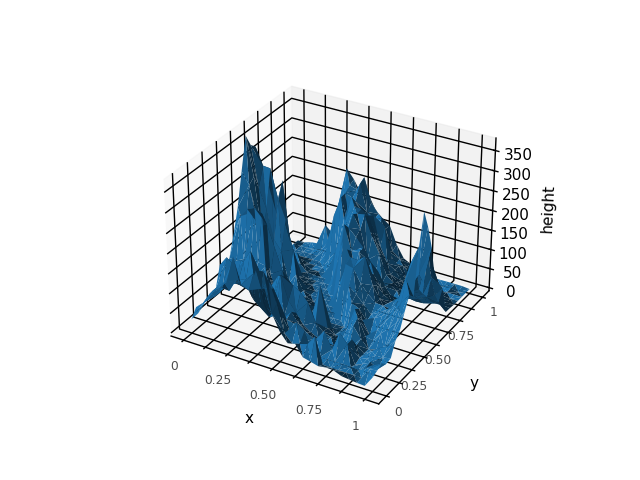

In [3]:
%matplotlib widget

import pandas as pd
import numpy as np

z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv', index_col=0)
z = z_data.values
nrows, ncols = z.shape
x, y = np.linspace(0, 1, nrows), np.linspace(0, 1, ncols)
x, y = np.meshgrid(x, y)
mt_bruno_long = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'height': z.flatten()})

from plotnine import ggplot, geom_polygon, aes, theme_minimal
from plotnine.utils import to_rgba, SIZE_FACTOR
import matplotlib.pyplot as plt


class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])


class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )
print(
    ggplot_3d(mt_bruno_long)
    + aes(x='x', y='y', z='height')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

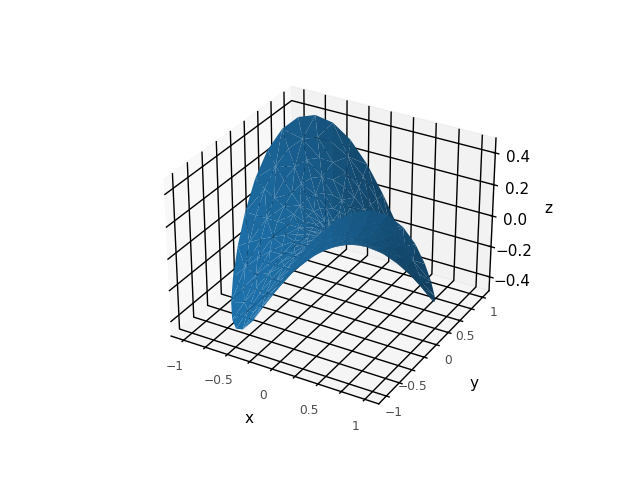

In [4]:
%matplotlib widget
from plotnine import ggplot, geom_polygon, aes, theme_minimal
from plotnine.utils import to_rgba, SIZE_FACTOR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])
        
class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )

n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

z = np.sin(-x*y)
df = pd.DataFrame(dict(x=x,y=y,z=z))

print(
    ggplot_3d(df)
    + aes(x='x', y='y', z='z')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

This most likely opened in the classic notebook interface. You can switch to JupyterLab by clicking on the Jupyter logo icon, to the upper left side above this notebook. Once JupyterLab opens you can open the same notebook there and run all the cells to see it work there. Then to test the addition of the semi-colon works in JupyterLab, you can add that after the closing parantheses in the first two cells of this notebook and re-run those cells. The object code should go away


---------

---------

#### Reference

See https://plotnine.readthedocs.io/en/stable/ for more information and plotnine options!  
The github repo for plotnine is found [here](https://github.com/has2k1/plotnine).
[This repository](https://github.com/has2k1/plotnine-examples) contains examples in the form of jupyter notebooks that are also part of the plotnine documentation.

------

### Anything else?

Anything else?